In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [53]:
# The Iris Dataset
# Loading the iris dataset
iris = datasets.load_iris()

In [54]:
df = pd.DataFrame()
df['sepal_length'] = iris['data'][:,0]
df['sepal_width'] = iris['data'][:,1]
df['petal_length'] = iris['data'][:,2]
df['petal_width'] = iris['data'][:,3]
df['target'] = iris['target'] == 1

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,False
1,4.9,3.0,1.4,0.2,False
2,4.7,3.2,1.3,0.2,False
3,4.6,3.1,1.5,0.2,False
4,5.0,3.6,1.4,0.2,False


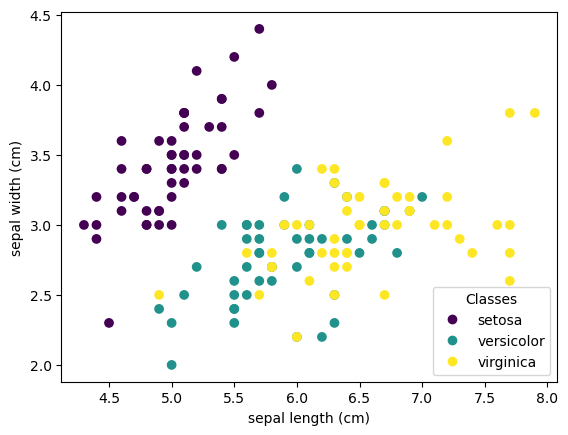

In [56]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

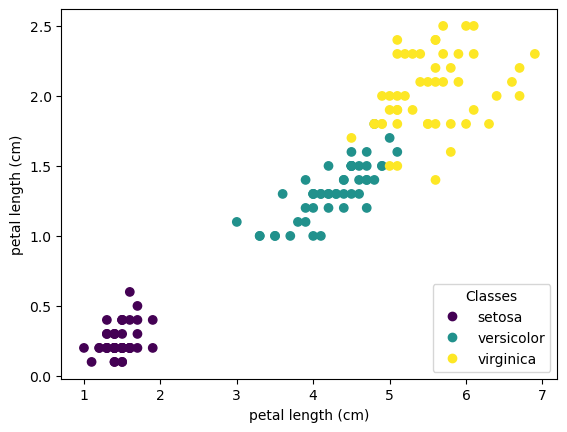

In [57]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[2])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [58]:
# Define train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['sepal_length','sepal_width','petal_length', 'petal_width']], 
                                        df['target'], 
                                        test_size=0.2, 
                                        random_state=42)

In [59]:
# Normalize data
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [60]:
# Instantiate the classifier model
svm_classifier = sklearn.svm.LinearSVC()

In [61]:
# Fit the model with the training data
svm_classifier.fit(X_train, y_train)

LinearSVC()

In [62]:
# Predict new intances classes
y_predicted = svm_classifier.predict(scaler.transform(X_test))

In [63]:
# Evaluate model's accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.8333333333333334


In [64]:
# Soft Margin Classification
svm_classifier_NL = sklearn.svm.SVC(kernel='poly', degree=5, C=10, coef0=1)
svm_classifier_NL.fit(X_train, y_train)
y_predicted = svm_classifier_NL.predict(scaler.transform(X_test))
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.9666666666666667


In [65]:
svm_gaussian_classifier = sklearn.svm.SVC(kernel='rbf',C=1)
svm_gaussian_classifier.fit(X_train, y_train)
y_predicted = svm_gaussian_classifier.predict(scaler.transform(X_test))
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

1.0
